In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
data = load_breast_cancer()
df = pd.DataFrame(data.data,columns=data.feature_names)
y = pd.Series(data.target)

In [6]:
x_train,x_test,y_train,y_test = train_test_split(df,y,random_state=42,test_size=0.2)

In [8]:
model = GradientBoostingClassifier(n_estimators=50,learning_rate=0.1,max_depth=4,random_state=42)
model.fit(x_train,y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,50
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,4
,min_impurity_decrease,0.0
,init,None


In [9]:
y_pred = model.predict(x_test)

In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.956140350877193
Confusion Matrix:
 [[40  3]
 [ 2 69]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



C:\Users\agamb\AppData\Local\Temp\ipykernel_9512\3072705230.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values,y=top_features.index,palette='viridis')


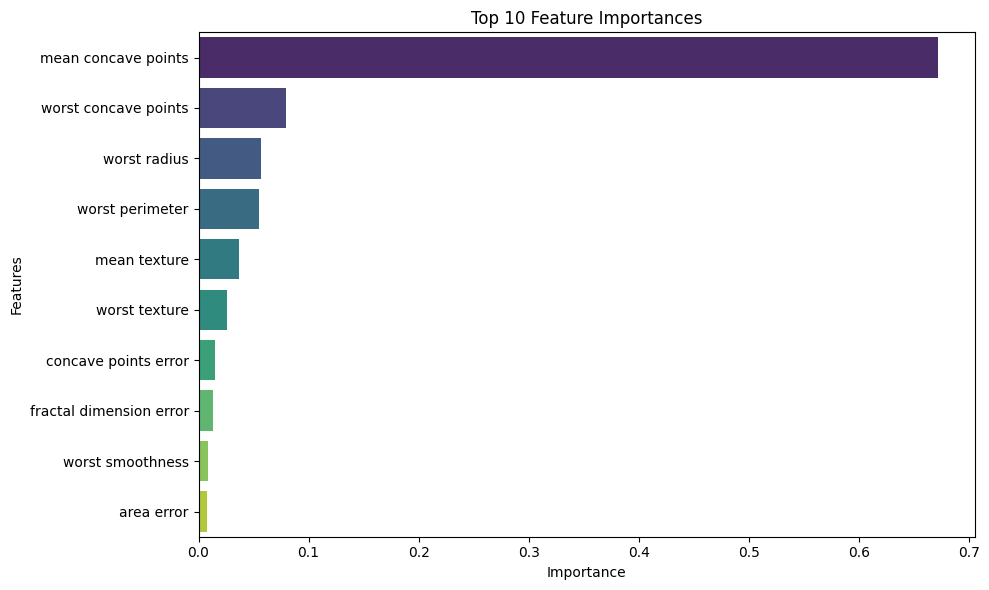

In [14]:
feature_importances = pd.Series(model.feature_importances_,index=df.columns)
top_features = feature_importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_features.values,y=top_features.index,palette='viridis')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel('Features')
plt.tight_layout()
plt.show()